Primary inspirations:

- https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Install nltk things
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kenneth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kenneth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Get document-topic matrix
def get_document_topic_matrix(model, bow):
    x = []
    for d in bow:
        # Get document's topics
        doc_topics = lda.get_document_topics(d)
        
        # Extract just the document-topic probabilities
        x.append([i[1] for i in doc_topics])

    return x

# Case 1: 3 docs, 1 topic per doc

Expect to see three topics, with the majority of the probability weights to correspond to the known topic

In [4]:
# Create "docs"
docs = [
    'a1 a2 a3',
    'b1 b2 b3',
    'c1 c2 c3',    
]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs)

[['a1', 'a2', 'a3'], ['b1', 'b2', 'b3'], ['c1', 'c2', 'c3']]


In [5]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1)]]

In [6]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [7]:
# Inspect topics
lda.show_topics()

[(0,
  '0.222*"a1" + 0.222*"a2" + 0.222*"a3" + 0.056*"b1" + 0.056*"b2" + 0.056*"b3" + 0.056*"c1" + 0.056*"c3" + 0.056*"c2"'),
 (1,
  '0.222*"c1" + 0.222*"c2" + 0.222*"c3" + 0.056*"a3" + 0.056*"b2" + 0.056*"b3" + 0.056*"a1" + 0.056*"a2" + 0.056*"b1"'),
 (2,
  '0.222*"b1" + 0.222*"b2" + 0.222*"b3" + 0.056*"a2" + 0.056*"a3" + 0.056*"c3" + 0.056*"a1" + 0.056*"c1" + 0.056*"c2"')]

In [8]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)

array([[0.83, 0.08, 0.08],
       [0.08, 0.08, 0.83],
       [0.08, 0.83, 0.08]], dtype=float32)

In [9]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.22, 0.22, 0.22, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.22, 0.22, 0.22],
       [0.06, 0.06, 0.06, 0.22, 0.22, 0.22, 0.06, 0.06, 0.06]],
      dtype=float32)

# Case 1.1: Many docs

A little surprised that the off-topic words have such a high relative probability of appearing the topic (~6% for each word that doesn't appear at all in the docs with the topics).  But this might be primarily a sample size thing.

Repeat Case 1 but instead have ~1k randomly sampled docs from the three used in Case 1

In [10]:
# Create "docs"
np.random.seed(666)

docs_sample = np.random.choice(['a', 'b', 'c'], size=100)

docs = [f'{x}1 {x}2 {x}3' for x in docs_sample]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs[:10])

[['a1', 'a2', 'a3'], ['c1', 'c2', 'c3'], ['b1', 'b2', 'b3'], ['c1', 'c2', 'c3'], ['c1', 'c2', 'c3'], ['c1', 'c2', 'c3'], ['b1', 'b2', 'b3'], ['c1', 'c2', 'c3'], ['a1', 'a2', 'a3'], ['b1', 'b2', 'b3']]


In [11]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow[:10]

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1)],
 [(6, 1), (7, 1), (8, 1)]]

In [12]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics = 3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [13]:
# Inspect topics
lda.show_topics()

[(0,
  '0.327*"a1" + 0.327*"a2" + 0.327*"a3" + 0.003*"c1" + 0.003*"c2" + 0.003*"c3" + 0.003*"b3" + 0.003*"b1" + 0.003*"b2"'),
 (1,
  '0.326*"b1" + 0.326*"b2" + 0.326*"b3" + 0.004*"a3" + 0.004*"a1" + 0.004*"a2" + 0.004*"c3" + 0.004*"c2" + 0.004*"c1"'),
 (2,
  '0.327*"c1" + 0.327*"c2" + 0.327*"c3" + 0.003*"a3" + 0.003*"a2" + 0.003*"a1" + 0.003*"b3" + 0.003*"b1" + 0.003*"b2"')]

In [14]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)[:5, :]

array([[0.83, 0.08, 0.08],
       [0.08, 0.08, 0.83],
       [0.08, 0.83, 0.08],
       [0.08, 0.08, 0.83],
       [0.08, 0.08, 0.83]], dtype=float32)

In [15]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.33, 0.33, 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.33, 0.33],
       [0.  , 0.  , 0.  , 0.33, 0.33, 0.33, 0.  , 0.  , 0.  ]],
      dtype=float32)

# Case 2: 2 equal topics per doc

In [16]:
# Create "docs"
docs = [
    'a1 a2 a3 b1 b2 b3',
    'b1 b2 b3 c1 c2 c3',
    'c1 c2 c3 a1 a2 a3',    
]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs)

[['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['b1', 'b2', 'b3', 'c1', 'c2', 'c3'], ['c1', 'c2', 'c3', 'a1', 'a2', 'a3']]


In [17]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (2, 1), (6, 1), (7, 1), (8, 1)]]

In [18]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [19]:
# Inspect topics
lda.show_topics()

[(0,
  '0.192*"a2" + 0.192*"a1" + 0.192*"a3" + 0.111*"b1" + 0.111*"b2" + 0.111*"b3" + 0.030*"c3" + 0.030*"c1" + 0.030*"c2"'),
 (1,
  '0.192*"c2" + 0.192*"c1" + 0.192*"c3" + 0.111*"b2" + 0.111*"b3" + 0.111*"b1" + 0.030*"a3" + 0.030*"a1" + 0.030*"a2"'),
 (2,
  '0.111*"b3" + 0.111*"b2" + 0.111*"b1" + 0.111*"a3" + 0.111*"a2" + 0.111*"a1" + 0.111*"c3" + 0.111*"c1" + 0.111*"c2"')]

In [20]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.19, 0.19, 0.19, 0.11, 0.11, 0.11, 0.03, 0.03, 0.03],
       [0.03, 0.03, 0.03, 0.11, 0.11, 0.11, 0.19, 0.19, 0.19],
       [0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11]],
      dtype=float32)

In [21]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)

array([[0.9 , 0.05, 0.05],
       [0.05, 0.9 , 0.05],
       [0.48, 0.48, 0.05]], dtype=float32)

# Case 2.1: Many docs

A little surprised that one of the topics has "everything" as an important element.  But this might also be primarily a sample size thing.

Repeat Case 2 but instead have ~1k randomly sampled docs from the three used in Case 2

In [22]:
# Create "docs"
np.random.seed(1337)

docs_sample = np.random.choice(['a', 'b', 'c'], size=100)

def gen_string(x):
    if x == 'a':
        return 'a1 a2 a3 b1 b2 b3'
    elif x == 'b':
        return 'b1 b2 b3 c1 c2 c3'
    elif x == 'c':
        return 'c1 c2 c3 a1 a2 a3'
    raise ValueError(f'value {x} not supported')

docs = [gen_string(x) for x in docs_sample]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs[:10])

[['b1', 'b2', 'b3', 'c1', 'c2', 'c3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['b1', 'b2', 'b3', 'c1', 'c2', 'c3'], ['c1', 'c2', 'c3', 'a1', 'a2', 'a3'], ['c1', 'c2', 'c3', 'a1', 'a2', 'a3'], ['c1', 'c2', 'c3', 'a1', 'a2', 'a3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['b1', 'b2', 'b3', 'c1', 'c2', 'c3']]


In [23]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (2, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]

In [24]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [25]:
# Inspect topics
lda.show_topics()

[(0,
  '0.166*"a1" + 0.166*"a2" + 0.166*"a3" + 0.166*"b1" + 0.166*"b2" + 0.166*"b3" + 0.002*"c1" + 0.002*"c2" + 0.002*"c3"'),
 (1,
  '0.166*"a2" + 0.166*"a1" + 0.166*"a3" + 0.166*"c2" + 0.166*"c3" + 0.166*"c1" + 0.002*"b3" + 0.002*"b1" + 0.002*"b2"'),
 (2,
  '0.166*"b2" + 0.166*"b3" + 0.166*"b1" + 0.166*"c1" + 0.166*"c2" + 0.166*"c3" + 0.002*"a3" + 0.002*"a2" + 0.002*"a1"')]

In [26]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.17, 0.17, 0.17, 0.  , 0.  , 0.  , 0.17, 0.17, 0.17],
       [0.  , 0.  , 0.  , 0.17, 0.17, 0.17, 0.17, 0.17, 0.17],
       [0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)[:5, :]

array([[0.05, 0.05, 0.9 ],
       [0.9 , 0.05, 0.05],
       [0.9 , 0.05, 0.05],
       [0.05, 0.05, 0.9 ],
       [0.05, 0.9 , 0.05]], dtype=float32)

Much better, though interesting that we're still seeing some "off topic" percentages of generally ~10% per doc

# Case 3: 3 cascading topics per doc

In [28]:
# Create "docs"
docs = [
    'a1 a2 a3 b1 b2 c1',
    'b1 b2 b3 c1 c2 a1',
    'c1 c2 c3 a1 a2 b1',    
]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs)

[['a1', 'a2', 'a3', 'b1', 'b2', 'c1'], ['b1', 'b2', 'b3', 'c1', 'c2', 'a1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1']]


In [29]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (1, 1), (3, 1), (5, 1), (7, 1), (8, 1)]]

In [30]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [31]:
# Inspect topics
lda.show_topics()

[(0,
  '0.148*"a1" + 0.148*"b1" + 0.148*"c1" + 0.148*"a2" + 0.148*"b2" + 0.148*"a3" + 0.037*"c2" + 0.037*"c3" + 0.037*"b3"'),
 (1,
  '0.148*"c1" + 0.148*"a1" + 0.148*"b1" + 0.148*"c2" + 0.148*"b2" + 0.148*"b3" + 0.037*"a2" + 0.037*"a3" + 0.037*"c3"'),
 (2,
  '0.148*"c1" + 0.148*"b1" + 0.148*"a1" + 0.148*"c2" + 0.148*"a2" + 0.148*"c3" + 0.037*"b2" + 0.037*"a3" + 0.037*"b3"')]

In [32]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.04, 0.04, 0.04],
       [0.15, 0.04, 0.04, 0.15, 0.15, 0.15, 0.15, 0.15, 0.04],
       [0.15, 0.15, 0.04, 0.15, 0.04, 0.15, 0.04, 0.15, 0.15]],
      dtype=float32)

In [33]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)

array([[0.89, 0.05, 0.05],
       [0.05, 0.89, 0.05],
       [0.05, 0.05, 0.89]], dtype=float32)

# Case 3.1: Many docs

Directionally isn't bad, but yet again it's surprising it's not distinguishing between primary and secondary topics.  But this might also be primarily a sample size thing.

Repeat Case 3 but instead have ~1k randomly sampled docs from the three used in Case 3

In [34]:
# Create "docs"
np.random.seed(369)

docs_sample = np.random.choice(['a', 'b', 'c'], size=100)

def gen_string(x):
    if x == 'a':
        return 'a1 a2 a3 b1 b2 c1'
    elif x == 'b':
        return 'b1 b2 b3 c1 c2 a1'
    elif x == 'c':
        return 'c1 c2 c3 a1 a2 b1'
    raise ValueError(f'value {x} not supported')

docs = [gen_string(x) for x in docs_sample]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs[:10])

[['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['b1', 'b2', 'b3', 'c1', 'c2', 'a1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['a1', 'a2', 'a3', 'b1', 'b2', 'c1'], ['a1', 'a2', 'a3', 'b1', 'b2', 'c1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1'], ['c1', 'c2', 'c3', 'a1', 'a2', 'b1']]


In [35]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (6, 1), (8, 1)]]

In [36]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [37]:
# Inspect topics
lda.show_topics()

[(0,
  '0.166*"a2" + 0.166*"a3" + 0.166*"a1" + 0.166*"c1" + 0.166*"b1" + 0.166*"b2" + 0.002*"c2" + 0.002*"c3" + 0.002*"b3"'),
 (1,
  '0.166*"b1" + 0.166*"a1" + 0.166*"c1" + 0.165*"c2" + 0.165*"b2" + 0.165*"b3" + 0.002*"a2" + 0.002*"c3" + 0.002*"a3"'),
 (2,
  '0.166*"c3" + 0.166*"a2" + 0.166*"c2" + 0.166*"b1" + 0.166*"c1" + 0.166*"a1" + 0.001*"b2" + 0.001*"a3" + 0.001*"b3"')]

In [38]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.17, 0.17, 0.17, 0.17, 0.  , 0.  , 0.17, 0.  , 0.17],
       [0.17, 0.  , 0.17, 0.17, 0.17, 0.  , 0.17, 0.16, 0.  ],
       [0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)[:5, :]

array([[0.05, 0.05, 0.89],
       [0.05, 0.89, 0.05],
       [0.05, 0.05, 0.89],
       [0.05, 0.05, 0.89],
       [0.89, 0.05, 0.05]], dtype=float32)

# Case 4: Random number of topics

Generate 1k docs with a randomly selected number of topics from the previously used 3

In [40]:
# Create "docs"
np.random.seed(404)

def gen_doc():
    n_topics = np.random.randint(3) + 1
    which_topics = np.random.choice(['a', 'b', 'c'], size=n_topics, replace=False)
    
    s = []
    for t in which_topics:
        s.append(f'{t}1 {t}2 {t}3')
        
    return ' '.join(s)

docs = [gen_doc() for x in range(1000)]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs[:10])

[['b1', 'b2', 'b3'], ['a1', 'a2', 'a3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['a1', 'a2', 'a3'], ['c1', 'c2', 'c3', 'b1', 'b2', 'b3'], ['c1', 'c2', 'c3', 'a1', 'a2', 'a3', 'b1', 'b2', 'b3'], ['b1', 'b2', 'b3', 'a1', 'a2', 'a3', 'c1', 'c2', 'c3'], ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3'], ['b1', 'b2', 'b3', 'c1', 'c2', 'c3', 'a1', 'a2', 'a3'], ['b1', 'b2', 'b3', 'a1', 'a2', 'a3']]


In [41]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow[:5]

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (6, 1), (7, 1), (8, 1)]]

In [42]:
# Train model
lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

In [43]:
# Inspect topics
lda.show_topics()

[(0,
  '0.223*"b1" + 0.223*"b2" + 0.223*"b3" + 0.110*"c1" + 0.110*"c3" + 0.110*"c2" + 0.000*"a1" + 0.000*"a2" + 0.000*"a3"'),
 (1,
  '0.229*"c2" + 0.229*"c3" + 0.229*"c1" + 0.104*"a3" + 0.104*"a2" + 0.104*"a1" + 0.000*"b3" + 0.000*"b1" + 0.000*"b2"'),
 (2,
  '0.229*"a3" + 0.229*"a2" + 0.229*"a1" + 0.104*"b3" + 0.104*"b2" + 0.104*"b1" + 0.001*"c3" + 0.001*"c2" + 0.001*"c1"')]

In [44]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.22, 0.22, 0.22, 0.  , 0.  , 0.  , 0.11, 0.11, 0.11],
       [0.  , 0.  , 0.  , 0.1 , 0.1 , 0.1 , 0.23, 0.23, 0.23],
       [0.1 , 0.1 , 0.1 , 0.23, 0.23, 0.23, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)[:5, :]

array([[0.83, 0.08, 0.09],
       [0.08, 0.09, 0.83],
       [0.06, 0.05, 0.89],
       [0.08, 0.09, 0.83],
       [0.89, 0.06, 0.05]], dtype=float32)

# Case 5: Random number of topics and random sampling of words

Generate 1k docs with a randomly selected number of topics with a random sampling of words

In [46]:
# Create "docs"
np.random.seed(8675309)

def gen_doc():
    n_topics = np.random.randint(3) + 1
    which_topics = np.random.choice(['a', 'b', 'c'], size=n_topics, replace=False)
    
    s = []
    for t in which_topics:
        n_words = np.random.randint(4) + 1
        which_words = np.random.choice([1, 2, 3, 4, 5], size=n_words, replace=True)
        for w in which_words:
            s.append(f'{t}{w}')
        
    return ' '.join(s)

docs = [gen_doc() for x in range(10000)]

# Split by space
docs = [d.split() for d in docs]

# Inspect
print(docs[:10])

[['b1', 'b1', 'b2', 'b3', 'c3'], ['a5'], ['a5'], ['b5', 'b5', 'a2', 'a4', 'a3', 'a2', 'c1'], ['c1', 'a4', 'a5', 'a4', 'a1'], ['c3', 'c2'], ['c5', 'b1', 'b3'], ['b3', 'b4', 'b3'], ['b2'], ['b2']]


In [47]:
# Create dictionary
dic = corpora.Dictionary(docs)

# Create bow matrix
bow = [dic.doc2bow(doc) for doc in docs]

# Inspect
bow[:5]

[[(0, 2), (1, 1), (2, 1), (3, 1)],
 [(4, 1)],
 [(4, 1)],
 [(5, 2), (6, 1), (7, 1), (8, 2), (9, 1)],
 [(4, 1), (7, 2), (9, 1), (10, 1)]]

In [48]:
# Train model
start = datetime.now()
print(f'Start: {start}')

lda = gensim.models.ldamodel.LdaModel(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

end = datetime.now()
print(f'End: {end}')
print(f'Elapsed: {end - start}')

Start: 2022-04-10 14:29:15.524653
End: 2022-04-10 14:31:06.545565
Elapsed: 0:01:51.020912


In [49]:
# Inspect topics
lda.show_topics()

[(0,
  '0.203*"b1" + 0.203*"b2" + 0.203*"b4" + 0.197*"b3" + 0.194*"b5" + 0.000*"a3" + 0.000*"a5" + 0.000*"c4" + 0.000*"a1" + 0.000*"a2"'),
 (1,
  '0.197*"a5" + 0.197*"a4" + 0.192*"a2" + 0.191*"a1" + 0.191*"a3" + 0.033*"c4" + 0.000*"b3" + 0.000*"b1" + 0.000*"b4" + 0.000*"c1"'),
 (2,
  '0.211*"c5" + 0.209*"c2" + 0.206*"c3" + 0.205*"c1" + 0.169*"c4" + 0.000*"a1" + 0.000*"b1" + 0.000*"b2" + 0.000*"a2" + 0.000*"b4"')]

In [50]:
# Topic-term matrix
np.round(lda.get_topics(), 2)

array([[0.2 , 0.2 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.  ,
        0.  , 0.  , 0.2 , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.2 , 0.19, 0.19, 0.2 , 0.  , 0.  , 0.19,
        0.  , 0.  , 0.  , 0.03],
       [0.  , 0.  , 0.  , 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  ,
        0.21, 0.21, 0.  , 0.17]], dtype=float32)

<AxesSubplot:>

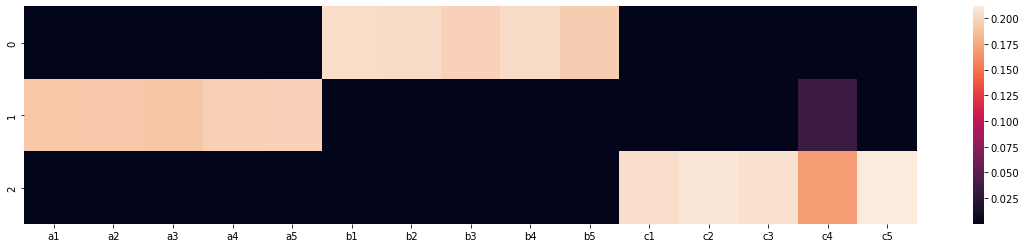

In [51]:
# Topic-term matrix as heatmap
words = list(dic.values())
words_alphabetical_index = np.argsort(words)
words_alphabetical = [words[i] for i in words_alphabetical_index]

plt.figure(figsize=(20, 4))
sns.heatmap(
    lda.get_topics()[:, words_alphabetical_index],
    xticklabels=words_alphabetical
)

In [52]:
# Document-topic matrix
np.round(get_document_topic_matrix(lda, bow), 2)[:5, :]

array([[0.72, 0.06, 0.22],
       [0.17, 0.67, 0.17],
       [0.17, 0.67, 0.17],
       [0.29, 0.54, 0.17],
       [0.06, 0.72, 0.22]], dtype=float32)

In [53]:
# "Optimal" number of topics based on coherence
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(f'{num_topics} topics')
        model = gensim.models.ldamodel.LdaModel(
            corpus,
            num_topics=num_topics,
            id2word = dic,
            passes=50,
            random_state=666
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary) #, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [54]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(
    dictionary=dic,
    corpus=bow,
    texts=docs,
    start=1,
    limit=6,
    step=1
)

1 topics
2 topics
3 topics
4 topics
5 topics


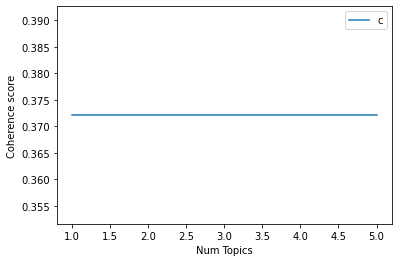

In [55]:
# Show graph
x = range(1, 6, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Whelp, looks like it doesn't matter how many topics we pick!

# Case 5.1: Same as 5 but with multicore

In [56]:
import multiprocessing

multiprocessing.cpu_count()

8

In [57]:
# Train model
start = datetime.now()
print(f'Start: {start}')

lda = gensim.models.ldamulticore.LdaMulticore(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666,
    workers = 2
)

end = datetime.now()
print(f'End: {end}')
print(f'Elapsed: {end - start}')

Start: 2022-04-10 14:41:29.545998
End: 2022-04-10 14:43:52.850549
Elapsed: 0:02:23.304551


In [58]:
# Train model
start = datetime.now()
print(f'Start: {start}')

lda = gensim.models.ldamulticore.LdaMulticore(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666,
    workers = 3
)

end = datetime.now()
print(f'End: {end}')
print(f'Elapsed: {end - start}')

Start: 2022-04-10 14:43:52.860879
End: 2022-04-10 14:46:07.558065
Elapsed: 0:02:14.697186


In [59]:
# Train model
start = datetime.now()
print(f'Start: {start}')

lda = gensim.models.ldamulticore.LdaMulticore(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666,
    workers = 4
)

end = datetime.now()
print(f'End: {end}')
print(f'Elapsed: {end - start}')

Start: 2022-04-10 14:46:07.568148
End: 2022-04-10 14:48:23.253155
Elapsed: 0:02:15.685007


In [60]:
# Train model
start = datetime.now()
print(f'Start: {start}')

lda = gensim.models.ldamulticore.LdaMulticore(
    bow,
    num_topics=3,
    id2word = dic,
    passes=50,
    random_state=666
)

end = datetime.now()
print(f'End: {end}')
print(f'Elapsed: {end - start}')

Start: 2022-04-10 14:48:23.262914
End: 2022-04-10 14:50:28.801625
Elapsed: 0:02:05.538711
